# Heart Disease Prediction with Python
#### Author: <a href="https://tonmoy-talukder.netlify.app/">Tonmoy Talukder</a>
CS Undergrad, <a href="https://www.aust.edu/"> AUST</a>, Dhaka 1208, Bangladesh

## Dataset Reference: 
<a href="https://archive.ics.uci.edu/ml/datasets/heart+disease">Browse The Dataset</a>

**Objectives:**
- Decision Tree Classification
- Cross-Validation

### Import required libraries

In [184]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, recall_score, f1_score

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.metrics import plot_confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

import warnings #to igonre the warnings
warnings.filterwarnings('ignore')


# check for the sklearn version
import sklearn
print("sklearn version: ",sklearn.__version__)

sklearn version:  0.24.1


### Loading Dataset
**Dataset Source:** <a href="https://archive.ics.uci.edu/ml/datasets/heart+disease">Browse Here</a>

In [185]:
df = pd.read_csv("processed.cleveland.data", header=None, na_values="?")
df = df.dropna()
display(df.head())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [186]:
print(df.shape)

(297, 14)


> **The dataset has 14 rows ans 297 columns**

#### Rename the column names

In [187]:
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 
              'restecg', 'thalach', 'exang', 'oldpeak', 
              'slope', 'ca', 'thal', 'hd']

display(df.head())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


### Dataset Information 

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    float64
 2   cp        297 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    float64
 6   restecg   297 non-null    float64
 7   thalach   297 non-null    float64
 8   exang     297 non-null    float64
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    float64
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
 13  hd        297 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 34.8 KB


**Columns Understanding:**

> **age:** age in years
> <br>**sex:** sex (1 = male; 0 = female)
> <br>**cp:** chest pain type
> - 1 = typical angina
> - 2 = atypical angina
> - 3 = non-anginal pain
> - 4 = asymptomatic
> 
> <br>**trestbps:** resting blood pressure (in mm Hg on admission to the hospital)
> <br>**chol:** serum cholestoral in mg/dl
> <br>**fbs:** (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
> <br>**restecg:** resting electrocardiographic results
> - 0 = normal
> - 1 = having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
> - 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria
> 
> <br>**thalach:** maximum heart rate achieved
> <br>**exang:** exercise induced angina (1 = yes; 0 = no)
> <br>**oldpeak:** ST depression induced by exercise relative to rest
> <br>**slope:** the slope of the peak exercise ST segment
> - 1 = upsloping
> - 2 = flat
> - 3 = downsloping
> 
> <br>**ca:** number of major vessels (0-3) colored by flourosopy
> <br>**thal:** 3 = normal; 6 = fixed defect; 7 = reversable defect
> <br>**hd:** heart disease 

*These are the **fourteen features** of this dataset.*

#### Checking categorical variables

In [189]:
df['cp'].value_counts()

4.0    142
3.0     83
2.0     49
1.0     23
Name: cp, dtype: int64

In [190]:
df['restecg'].value_counts()

0.0    147
2.0    146
1.0      4
Name: restecg, dtype: int64

### Checking missing value 

In [191]:
#check missing value 
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
hd          0
dtype: int64

In [192]:
assert df.isnull().sum().sum() == 0

> **There are no missing value in this dataset.**

In [193]:
# Renamimng the columns' names which are a little bit hard to understand
df = df.rename(columns={'age':'Age', 
                        'sex':'Sex',
                        'cp': 'Chest_Pain',
                        'trestbps': 'Resting_Blood_Pressure',
                        'chol': 'Cholestoral',
                        'fbs': 'Fasting_Blood_Sugar',
                        'restecg': 'Rest_ECG',
                        'thalach': 'Max_Heart_Rate',
                        'exang': 'Exercise_Induced_Aangina',
                        'oldpeak': 'Oldpeak',
                        'slope': 'Slope',
                        'ca': 'CA',
                        'thal': 'Defectivity',
                        'hd': 'Heart_disease'})

display(df.head())

,Age,Sex,Chest_Pain,Resting_Blood_Pressure,Cholestoral,Fasting_Blood_Sugar,Rest_ECG,Max_Heart_Rate,Exercise_Induced_Aangina,Oldpeak,Slope,CA,Defectivity,Heart_disease
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


#### Target variable: 'hd'

In [194]:
print(df['Heart_disease'].value_counts())

0    160
1     54
2     35
3     35
4     13
Name: Heart_disease, dtype: int64


In [195]:
df[df['Heart_disease'] > 1] = 1

print(df['Heart_disease'].value_counts())

0    160
1    137
Name: Heart_disease, dtype: int64


In [196]:
display(df.describe())

,Age,Sex,Chest_Pain,Resting_Blood_Pressure,Cholestoral,Fasting_Blood_Sugar,Rest_ECG,Max_Heart_Rate,Exercise_Induced_Aangina,Oldpeak,Slope,CA,Defectivity,Heart_disease
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,38.750842,0.730640,2.390572,94.101010,176.754209,0.367003,0.942761,112.252525,0.437710,0.787879,1.336700,0.562290,3.286195,0.461279
std,24.818501,0.444376,1.197821,59.822795,117.816094,0.482801,0.846349,71.612180,0.496942,0.742977,0.546271,0.675582,2.083294,0.499340
min,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,48.000000,1.000000,2.000000,120.000000,218.000000,0.000000,1.000000,149.000000,0.000000,1.000000,1.000000,0.000000,3.000000,0.000000
75%,58.000000,1.000000,3.000000,135.000000,258.000000,1.000000,2.000000,164.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000
max,76.000000,1.000000,4.000000,192.000000,564.000000,1.000000,2.000000,202.000000,1.000000,4.200000,3.000000,3.000000,7.000000,1.000000


#### Create feature set and target

In [197]:
X = df.drop('Heart_disease', axis=1)
y = df[['Heart_disease']]

print("Features:" ,X.shape)
print("Targets:" ,y.shape)

Features: (297, 13)
Targets: (297, 1)


### One-hot Encoding

In [198]:
X = pd.get_dummies(X, columns=['Chest_Pain', 'Rest_ECG', 'Slope', 'Defectivity'], drop_first=True)

display(X.head())
print(X.shape)

,Age,Sex,Resting_Blood_Pressure,Cholestoral,Fasting_Blood_Sugar,Max_Heart_Rate,Exercise_Induced_Aangina,Oldpeak,CA,Chest_Pain_2.0,Chest_Pain_3.0,Chest_Pain_4.0,Rest_ECG_1.0,Rest_ECG_2.0,Slope_2.0,Slope_3.0,Defectivity_3.0,Defectivity_6.0,Defectivity_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,0,0,0,0,1,0,1,0,1,0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,0,0,1,0,0,0,0,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,0,1,0,1,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,1,0,0,0,0,1,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,1,0,0,0,1,0,0,1,0,0


(297, 19)


#### Split the dataset intro train and test set

In [199]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42, 
                                                    stratify=y)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(237, 19) (60, 19) (237, 1) (60, 1)


### Stratification

In [200]:
class_0_train = y_train['Heart_disease'].value_counts().values[0]
class_1_train = y_train['Heart_disease'].value_counts().values[1]

train_ratio = class_1_train/class_0_train
print("Training Ratio: ",train_ratio)

Training Ratio:  0.8515625


In [201]:
class_0_test = y_test['Heart_disease'].value_counts().values[0]
class_1_test = y_test['Heart_disease'].value_counts().values[1]

test_ratio = class_1_test/class_0_test
print("Test Ratio: ",test_ratio)

Test Ratio:  0.875


### Training: Decision Tree Classifier

In [202]:
model_DT = DecisionTreeClassifier(random_state=42)
model_DT = model_DT.fit(X_train, y_train)

#### Prediction

In [203]:
y_pred = model_DT.predict(X_test)

#### Prediction Comparison with the test data

In [204]:
y_test['probability'] = np.round(model_DT.predict_proba(X_test)[:,1], 2)
y_test['predicted_Heart_disease'] = y_pred

display(y_test.sample(10))

,Heart_disease,probability,predicted_Heart_disease
3,0,1.0,1
93,0,0.0,0
221,0,1.0,1
239,0,0.0,0
281,0,0.0,0
34,0,0.0,0
66,1,0.0,0
236,1,1.0,1
1,1,1.0,1
64,1,1.0,1


### Tree diagram of the Decision Tree

> *Visualize decision tree without GraphViz using <a href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html">plot_tree</a> function.*

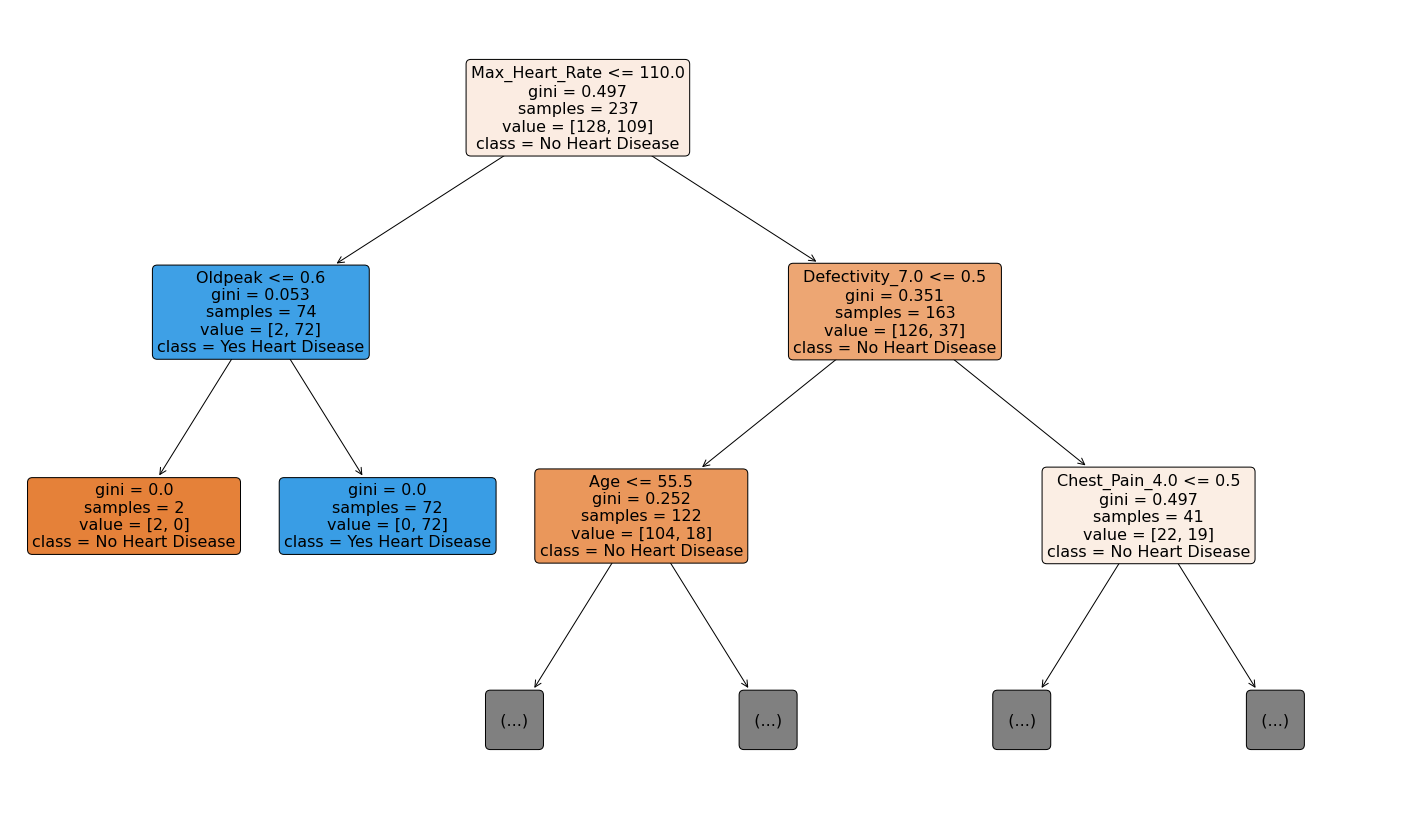

In [205]:
plt.figure(figsize = (25, 15))
plot_tree(model_DT, 
          filled=True,
          rounded=True,
          class_names = ["No Heart Disease", "Yes Heart Disease"],
          feature_names = X.columns,
          max_depth=2, 
          fontsize=16)

plt.show()

## Model Performance Evaluation

### Confusion Matrix

In [206]:
confusion_matrix_ = confusion_matrix(y_test['Heart_disease'], 
                                     y_test['predicted_Heart_disease'])

print('confusion_matrix: \n', confusion_matrix_)

confusion_matrix: 
 [[26  6]
 [ 5 23]]


In [207]:
y_test['Heart_disease'].value_counts()

0    32
1    28
Name: Heart_disease, dtype: int64

In [208]:
TP = confusion_matrix_[1,1]
print("True Positives = ", TP)

TN = confusion_matrix_[0,0]
print("True Negatives = ", TN)


FP = confusion_matrix_[0,1]
print("False Positives = ", FP)

FN = confusion_matrix_[1,0]
print("False Negatives = ", FN)

True Positives =  23
True Negatives =  26
False Positives =  6
False Negatives =  5


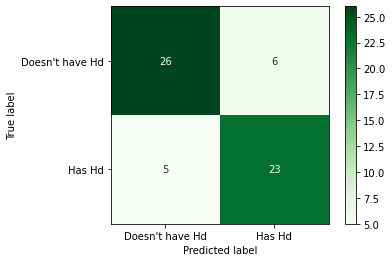

In [209]:
plot_confusion_matrix(model_DT, 
                      X_test, 
                      y_test['Heart_disease'], 
                      display_labels=["Doesn't have Hd", "Has Hd"],
                      cmap='Greens')
plt.show()

In [210]:
# calculate the accuracy of the model using the sklearn built-in function
accuracy_ = accuracy_score(y_test['Heart_disease'], 
                           y_test['predicted_Heart_disease'])*100

print('Accuracy = ', np.round(accuracy_, 2),"%") #Higher Better

Accuracy =  81.67 %


#### Precision

In [211]:
precision_ = np.round(precision_score(y_test['Heart_disease'], 
                               y_test['predicted_Heart_disease']), 2)
recall_ = np.round(recall_score(y_test['Heart_disease'], 
                               y_test['predicted_Heart_disease']), 2)
f1_score_ = np.round(f1_score(y_test['Heart_disease'], 
                               y_test['predicted_Heart_disease']), 2)

print("Precision = ", precision_*10,"out of 10") #Higher Better
print("Recall = ", recall_*10,"out of 10") #Higher Better
print("f1 score = ", np.round(f1_score_*10, 2),"out of 10") #Higher Better

Precision =  7.9 out of 10
Recall =  8.2 out of 10
f1 score =  8.1 out of 10


#### True Positive Rate, False Positive Rate

In [212]:
#Threshold = 0.5
TPR = np.round(TP/(TP+FN), 2)
FPR = np.round(FP/(FP+TN), 2)

print("True Positive Rate = ", TPR*100,"%") #Higher Better
print("False Positive Rate = ", FPR*100,"%") # Lower Better

True Positive Rate =  82.0 %
False Positive Rate =  19.0 %


### ROC: Receiver Operating Characterisitcs and AUC: Area Under the Curve

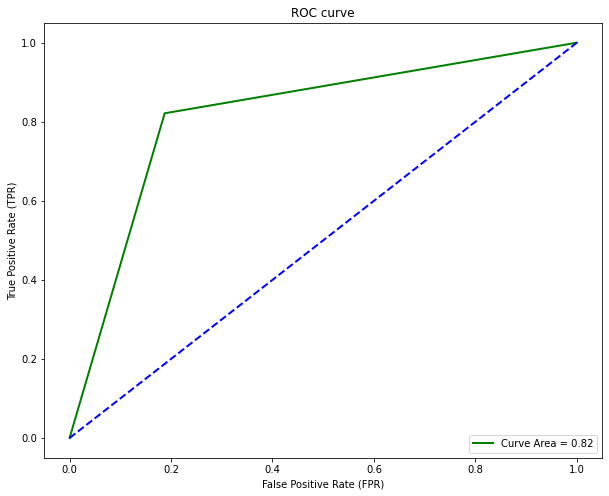

In [213]:
fpr, tpr, thr = roc_curve(y_test['Heart_disease'], 
                          y_test['predicted_Heart_disease'])
auc = np.round(roc_auc_score(y_test['Heart_disease'], 
                             y_test['predicted_Heart_disease']), 2)

plt.figure(figsize=(10, 8))
plt.plot(fpr, 
         tpr, 
         color='green', 
         lw=2, 
         label="Curve Area = " +str(auc))

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

In [214]:
roc_data = pd.DataFrame({"threshold": thr, "FPR": fpr, "TPR": tpr})
display(roc_data.tail(10))

,threshold,FPR,TPR
0,2,0.0000,0.000000
1,1,0.1875,0.821429
2,0,1.0000,1.000000


### Classification report

In [215]:
class_report = classification_report(y_test['Heart_disease'], 
                                   y_test['predicted_Heart_disease'])
print("Classification Report: \n", class_report)

Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.81      0.83        32
           1       0.79      0.82      0.81        28

    accuracy                           0.82        60
   macro avg       0.82      0.82      0.82        60
weighted avg       0.82      0.82      0.82        60



## Outcome

**Model Result:**
> **Model is saying 81.67 % patients has Heart Disease .**

**About The Model:**
> *We are getting the Precision value from the model is 7.9 out of 10. What should be more near to 10. The Accuracy of the model is 81.67%. If the accuracy rate would more than 85% and the precision value is greater than 8 then we can say this model is pretty good, but the model is not what.* 